In [42]:
import pandas as pd

1. drinks.csv 파일 로드
2. 결측치 확인 
3. continent 컬럼에 결측치 존재 -> 결측치는 'OT'로 변경
4. continent별 spirit_serving 컬럼의 평균, 최소, 최대, 합을 출력
5. 이 데이터를 바형 그래프로 출력
6. total_liters_of_pure_alcohol 컬럼의 평균보다 높은 continent가 어디인지 확인

In [83]:
drinks = pd.read_csv("../csv/drinks.csv")

In [84]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [85]:
drinks['continent'] = drinks['continent'].fillna('OT')

# case2
# drinks = drinks.fillna('OT')
# 결측치는 continent에 밖에 없으니까 이렇게 해도 상관은 없는데, 위에가 더 확실함

In [86]:
drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [89]:
drinks_group = drinks.groupby('continent').mean()['spirit_servings']
drinks_group.head()

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
Name: spirit_servings, dtype: float64

In [108]:
drinks_group.index

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

In [62]:
drinks_mean = drinks.groupby('continent').mean()['spirit_servings']
drinks_min = drinks.groupby('continent').min()['spirit_servings']
drinks_max = drinks.groupby('continent').max()['spirit_servings']
drinks_sum = drinks.groupby('continent').sum()['spirit_servings']

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
Name: spirit_servings, dtype: float64

# 보충 : groupby 한 번에 묶기

In [110]:
# 이렇게 하면 4개가 한 번에 나옴
result = drinks.groupby('continent').agg(['mean', 'sum', 'min', 'max'])['spirit_servings']
result

,mean,sum,min,max
continent,,,,
AF,16.339623,866,0,152
AS,60.840909,2677,0,326
EU,132.555556,5965,0,373
OC,58.437500,935,0,254
OT,165.739130,3812,68,438
SA,114.750000,1377,25,302


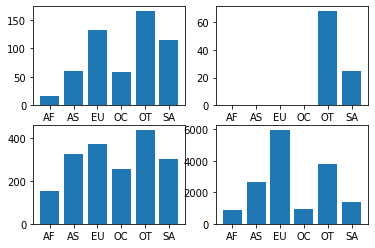

In [115]:
# 시각화 : 바 그래프로 표시
# plt.bar(x, y)
# x -> 그룹화 기준 continent
# y -> 평균, 합계, 최소, 최대
# 총 4개의 그래프를 subplot 이용해서 그리기

mean = result['mean']
min = result['min']
max = result['max']
sum = result['sum']

x = result.index


# subplot(행의 수, 열의 수, 위치)
# 4개의 그래프 행의 수 * 열의 수 = 4
plt.subplot(2, 2, 1)
plt.bar(x, mean)
plt.subplot(2, 2, 2)
plt.bar(x, min)
plt.subplot(2, 2, 3)
plt.bar(x, max)
plt.subplot(2, 2, 4)
plt.bar(x, sum)
plt.show()

내가 푼 내용

In [22]:
import matplotlib.pyplot as plt

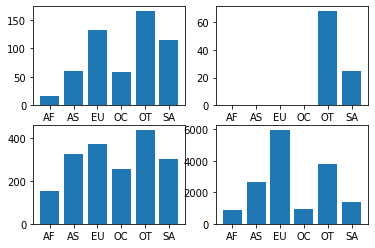

In [116]:
a = drinks_group.index
a1 = drinks_mean.to_list()
a2 = drinks_min.to_list()
a3 = drinks_max.to_list()
a4 = drinks_sum.to_list()

plt.subplot(2, 2, 1)
plt.bar(a, a1)
plt.subplot(2, 2, 2)
plt.bar(a, a2)
plt.subplot(2, 2, 3)
plt.bar(a, a3)
plt.subplot(2, 2, 4)
plt.bar(a, a4)
plt.show()

# subplot(행, 열, 위치)
# subplot(2, 1, 2) 1
#                  2 #여기 나오는 것
# subplot(2, 2, 4) 1 2
#                  3 4 #여기 나옴

In [101]:
total_mean = drinks['total_litres_of_pure_alcohol'].mean()
total_mean

4.717098445595855

In [118]:
conti_drinks = drinks.groupby('continent').mean()['total_litres_of_pure_alcohol']
conti_drinks.head()

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
Name: total_litres_of_pure_alcohol, dtype: float64

In [107]:
total_drinks.apply(lambda x : x if (x > total_mean) else )

SyntaxError: invalid syntax (<ipython-input-107-4418c1f3afde>, line 1)

# 어느 대륙이 술 소비량이 가장 많은지 비교

In [117]:
# 전체 데이터의 술 소비량 평균
total_mean

4.717098445595855

In [119]:
# 대륙별 술 소비량 평균
mean_continent = conti_drinks
mean_continent

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [120]:
mean_continent[mean_continent >= total_mean] #조건식넣으면 True만 출력함

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [121]:
mean_continent >= total_mean

continent
AF    False
AS    False
EU     True
OC    False
OT     True
SA     True
Name: total_litres_of_pure_alcohol, dtype: bool

In [122]:
# 한 플롯에 다 그려보기
import numpy as np

In [123]:
cnt = len(x)
cnt

6

In [125]:
index = np.arange(cnt)
index

array([0, 1, 2, 3, 4, 5])

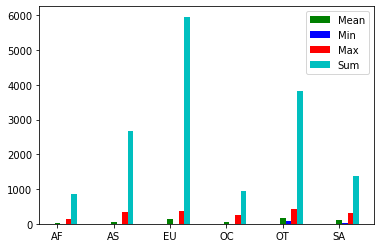

In [137]:
# 두 번 쓰면 그래프 하나에 두 개 나옴. 대신 겹치면 안됨 => 단, 약간의 편법임
bar_width = 0.1

plt.bar(index, means, bar_width, color='g', label='Mean')
plt.bar(index+bar_width, min, bar_width, color='b', label='Min') # x축의 값을 bar_width만큼 옆으로
plt.bar(index+bar_width*2, max, bar_width, color = 'r', label='Max')
plt.bar(index+bar_width*3, sum, bar_width, color='c', label='Sum')

plt.xticks(index, x) #x축의 뭔가의 설정을 변경하겠다~ index를 x값 이름으로 대체할래 
plt.legend() #범례

plt.show()